In [1]:
import numpy as np
import matplotlib.pyplot as plt

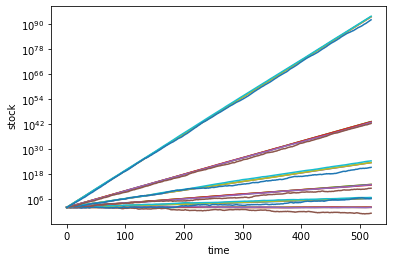

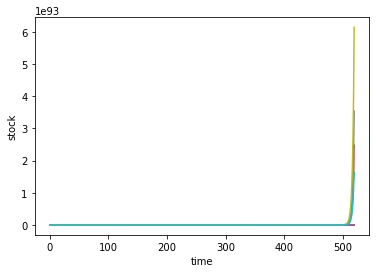

In [117]:

# the geometric brownian motion simulation:

def SDE(s0=100,mu=0.2,sigma=0.68,deltaT=52,dt=0.1):
    s = np.ones(int(deltaT/dt)) 
    s[0] = s0
    for i in range(1, len(s)):
        s[i] =s[i-1]+ mu*s[i-1]*dt + sigma *s[i-1]*(np.random.normal()/np.sqrt(len(s)))
        #
    return s


# making plots of different drifts and volatility:
plt.semilogy(SDE(mu = 0.2, sigma = 0.5))

mus = [0,0.2,0.5,1,2,5]
sigmas = [0.01, 0.1, 0.5, 1, 3]
for i in mus:
    for j in sigmas:
        plt.semilogy(SDE(mu=i, sigma=j), label=f"m:{i},s:{j}")
        plt.xlabel("time")
        plt.ylabel('stock')
plt.show()

for i in mus:
    for j in sigmas:
        plt.plot(SDE(mu=i, sigma=j), label=f"m:{i},s:{j}")
        plt.xlabel("time")
        plt.ylabel('stock')

plt.show()




We see the exponential increase which corresponds to the increments of the percentage of the price

In [113]:
# getting the data from yahoo
import yfinance as yf
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  2 of 2 completed


Text(0, 0.5, 'stock')

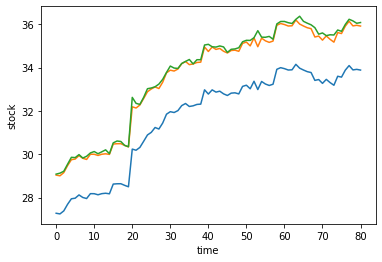

In [119]:
# making plots of the some of the yahoo data
plt.plot(data.values[:, 0])
plt.plot(data.values[:, 2])
plt.plot(data.values[:, 4])
plt.xlabel("time")
plt.ylabel('stock')

the data shows different variation of the price over time (that's a short time period)

In [121]:
from scipy import stats as sts
S = 200 #current stock
x = 200 # strike price
T = 1 # maturity
r = 0.15 # risk free rate
sigma = 0.1 # volatility


# calculating the call price of the option:

d1 = (np.log(S/x) + (r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
d2 = (np.log(S/x) + (r-0.5*sigma**2)*T)/(sigma*np.sqrt(T))

call = S*sts.norm.cdf(d1) - x*np.exp(-r*T)*sts.norm.cdf(d2)
print(call)

28.401697163907272


In [131]:
# getting the stock price using the code from last session:
def stock_price(s0=100,mu=0.2,sigma=0.68,deltaT=52,dt=0.1):
    n_step = int(deltaT/dt)
    nomral_w = np.ones(n_step)*0   
    for i in range(1,n_step):
        yi = np.random.normal()
        nomral_w[i] = nomral_w[i-1]+(yi/np.sqrt(n_step))
    
    time = np.linspace(0,deltaT,num=n_step)
    s = s0*(np.exp(((mu-(sigma**2/2))*time)+(sigma*nomral_w)))
    return s

Text(0, 0.5, 'stock')

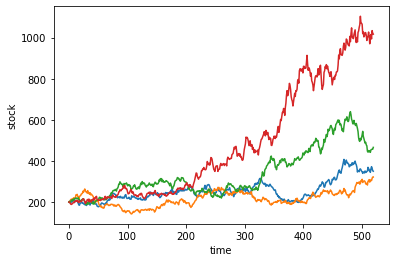

In [133]:
plt.plot(stock_price(s0=200,mu=0.2,sigma=0.6,deltaT=52,dt=0.1))
plt.plot(stock_price(s0=200,mu=0.2,sigma=0.6,deltaT=52,dt=0.1))
plt.plot(stock_price(s0=200,mu=0.2,sigma=0.6,deltaT=52,dt=0.1))
plt.plot(stock_price(s0=200,mu=0.2,sigma=0.6,deltaT=52,dt=0.1))
plt.xlabel("time")
plt.ylabel("stock")
plt.show()

Running different simulation provide different outcomes but the general trend is the increase of the price of the stock. This is heavily dependent on the volatitity, if we increase it, another trend is observed:

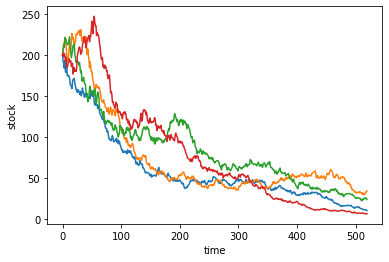

In [134]:
plt.plot(stock_price(s0=200,mu=0.2,sigma=0.7,deltaT=52,dt=0.1))
plt.plot(stock_price(s0=200,mu=0.2,sigma=0.7,deltaT=52,dt=0.1))
plt.plot(stock_price(s0=200,mu=0.2,sigma=0.7,deltaT=52,dt=0.1))
plt.plot(stock_price(s0=200,mu=0.2,sigma=0.7,deltaT=52,dt=0.1))
plt.xlabel("time")
plt.ylabel("stock")
plt.show()

Now it decreases after increasing the volatility

The black scholes assume that the risk free rate and volatility are constants. This is not always true so we can make the model more general by replacing r and sigma by functions of time and that function can be a nromal distribution where the mean is the starting value of r and sigma and the variance is any small number (e.g. 0.1)